In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [3]:
df = pd.read_excel('IncidentReport.xlsx')
df = df.loc[df['Duplicates'] == 1]
columns = ['Device Serial Number', 'Duplicates', 'Subtype', 'Device Name', 'Device OS']
df = df[columns]
crash_df = df.loc[(df['Subtype'] == 'OS BSOD')]
crash_df = crash_df.sort_values(by=['Device Serial Number'])
crash_sn = np.array(crash_df['Device Serial Number'])
crash_df.head(15)

,Device Serial Number,Duplicates,Subtype,Device Name,Device OS
69,4CE8401QY8,1,OS BSOD,SHINE6,Windows 10
192,5CD8185HY2,1,OS BSOD,RABADIA10,Windows 10
208,5CD8310N1B,1,OS BSOD,sszbook15,Windows 10
265,5CD9037LLL,1,OS BSOD,HOPKINSJ8,Windows 10
275,5CD9075S24,1,OS BSOD,JIMENGIL10,Windows 10
318,5CG43705LK,1,OS BSOD,INAMOCHI3,Windows 10
417,5CG51539R5,1,OS BSOD,CHERIFAH25,Windows 10
613,5CG5241TTV,1,OS BSOD,HDA3,Windows 10
635,5CG5242B9D,1,OS BSOD,SRIDHARR4,Windows 10
663,5CG52441G6,1,OS BSOD,CHENHAIG5,Windows 10


In [16]:
comparison_set = []
overlapping_df = pd.DataFrame()
for serial_no in crash_sn:
    new_df = df.loc[(df['Device Serial Number'] == serial_no)]
    new_df = new_df.loc[(df['Subtype'] != 'OS BSOD')]
    overlapping_df = pd.concat([overlapping_df, new_df])
overlapping_df = overlapping_df[['Device Serial Number', 'Subtype']]
overlapping_df.groupby(overlapping_df['Subtype']).count()

bsod_overlapping_df = pd.DataFrame(
                { "Subtype": ['CPU High Utilization', 'HDD Storage Capacity Full', 'Memory High Utilization', 'OS Unexpected Crash/Reboot'],
                  "Number of Cases" : [28, 2, 16, 30]})
bsod_overlapping_df = bsod_overlapping_df[['Subtype', 'Number of Cases']]
bsod_overlapping_df = bsod_overlapping_df.sort_values('Number of Cases', ascending=True)
bsod_overlapping_df

,Subtype,Number of Cases
1,HDD Storage Capacity Full,2
2,Memory High Utilization,16
0,CPU High Utilization,28
3,OS Unexpected Crash/Reboot,30


In [17]:
crash_overlapping_df = pd.DataFrame(
                { "Subtype": ['Battery Not Detected', 'Battery Predictive Failure', 'CPU High Utilization', 'HDD Storage Capacity Full', 'Memory High Utilization', 'OS BSOD'],
                  "Number of Cases" : [9, 3, 23, 4, 8, 30]})
crash_overlapping_df = crash_overlapping_df[['Subtype', 'Number of Cases']]
crash_overlapping_df = crash_overlapping_df.sort_values('Number of Cases', ascending=True)
crash_overlapping_df

,Subtype,Number of Cases
1,Battery Predictive Failure,3
3,HDD Storage Capacity Full,4
4,Memory High Utilization,8
0,Battery Not Detected,9
2,CPU High Utilization,23
5,OS BSOD,30


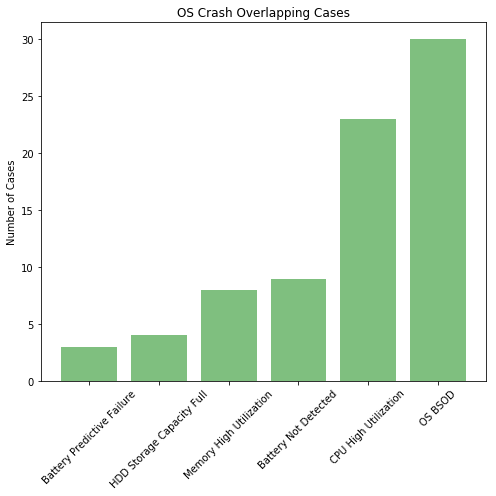

In [19]:
x_axis = np.arange(len(crash_overlapping_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(7,7))
plt.bar(x_axis, crash_overlapping_df["Number of Cases"], color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations, crash_overlapping_df["Subtype"], rotation=45)
plt.title("OS Crash Overlapping Cases")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.savefig("OS Crash Overlapping Cases.png")
plt.show()

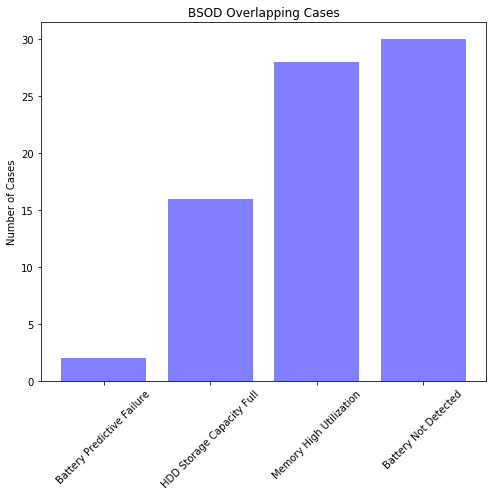

In [20]:
x_axis = np.arange(len(bsod_overlapping_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(7,7))
plt.bar(x_axis, bsod_overlapping_df["Number of Cases"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, crash_overlapping_df["Subtype"], rotation=45)
plt.title("BSOD Overlapping Cases")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.savefig("BSOD.png")
plt.show()